In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [406]:
train = pd.read_csv("aug_train.csv")
test = pd.read_csv("aug_test.csv")

In [407]:
train.head(100)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
0,0.624,Male,No relevent experience,no_enrollment,High School,NaN,5,NaN,never,21,0
1,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,>4,12,0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Public Sector,>4,26,0
3,0.624,Male,No relevent experience,Full time course,High School,NaN,1,NaN,never,30,1
4,0.920,Female,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,>4,46,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.527,Male,Has relevent experience,no_enrollment,Graduate,STEM,4,NaN,2,80,1
96,0.910,NaN,No relevent experience,Full time course,Graduate,STEM,9,NaN,1,22,0
97,0.897,NaN,Has relevent experience,no_enrollment,Masters,STEM,8,Pvt Ltd,1,55,0
98,0.925,Male,Has relevent experience,Part time course,Masters,STEM,9,Pvt Ltd,>4,23,0


In [408]:
print(train.to_string())

      city_development_index  gender      relevent_experience enrolled_university education_level major_discipline experience         company_type last_new_job  training_hours  target
0                      0.624    Male   No relevent experience       no_enrollment     High School              NaN          5                  NaN        never              21       0
1                      0.926    Male  Has relevent experience       no_enrollment        Graduate             STEM        >20                  NaN           >4              12       0
2                      0.920    Male  Has relevent experience       no_enrollment        Graduate             STEM        >20        Public Sector           >4              26       0
3                      0.624    Male   No relevent experience    Full time course     High School              NaN          1                  NaN        never              30       1
4                      0.920  Female  Has relevent experience       no_enrollmen

In [409]:
train.shape

(2100, 11)

In [410]:
train.describe()

,city_development_index,training_hours,target
count,2100.000000,2100.000000,2100.000000
mean,0.826898,65.896190,0.254762
std,0.124464,58.432483,0.435831
min,0.448000,1.000000,0.000000
25%,0.729250,24.000000,0.000000
50%,0.899000,49.000000,0.000000
75%,0.920000,89.250000,1.000000
max,0.949000,336.000000,1.000000


In [411]:
train.count()

city_development_index    2100
gender                    1585
relevent_experience       2100
enrolled_university       2051
education_level           2049
major_discipline          1768
experience                2090
company_type              1415
last_new_job              2048
training_hours            2100
target                    2100
dtype: int64

In [412]:
train.isna().sum()

city_development_index      0
gender                    515
relevent_experience         0
enrolled_university        49
education_level            51
major_discipline          332
experience                 10
company_type              685
last_new_job               52
training_hours              0
target                      0
dtype: int64

In [413]:
train.dtypes

city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

# Task1 Data clean, imputation #

### 1. in experience, replace >20 to 21; <1 to 1, and convert this as a numerical column ###

In [414]:
train['experience'] = train['experience'].replace({'>20': 21, '<1': 1}).astype(float)
test['experience'] = test['experience'].replace({'>20': 21, '<1': 1}).astype(float)

### 2. in last_new_job, replace >4 to 5; never to 0, and convert this as a numerical column ###

In [415]:
train['last_new_job'] = train['last_new_job'].replace({'>4': 5, 'never': 0}).astype(float)
test['last_new_job'] = test['last_new_job'].replace({'>4': 5, 'never': 0}).astype(float)

### 3. If the column is categorical, impute the missing value as its mode. If the column is numerical, impute the missing value as its median ###

In [416]:
for column in train.columns:
    if train[column].dtype == 'object':
        # Categorical column
        mode_value = train[column].mode()[0]
        train[column] = train[column].fillna(mode_value)
        test[column] = test[column].fillna(mode_value)
    else:
        # Numerical column
        median_value = train[column].median()
        train[column] = train[column].fillna(median_value)
        test[column] = test[column].fillna(median_value)

In [417]:
label_encoders = {}
for column in train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    train[column] = label_encoders[column].fit_transform(train[column])
    test[column] = label_encoders[column].transform(test[column])

# Task2 Classification #

### 1. Build a classification model from the training set ( you can use any algorithms) ###

In [418]:
X_train = train.drop(columns=['target'])
y_train = train['target']
X_test = test.drop(columns=['target'])
y_test = test['target']

In [419]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [420]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### 2. generate the confusion matrix and calculate the accuracy, precision, recall, and F1-score on training set.  ###

In [421]:
y_train_pred = model.predict(X_train)
print(y_train_pred)
y_train_pred = np.round(y_train_pred).astype(int)

train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

print("Training Set Evaluation:")
print("Confusion Matrix:\n", train_conf_matrix)
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)

[0.17   0.01   0.1225 ... 0.08   0.11   0.01  ]
Training Set Evaluation:
Confusion Matrix:
 [[1565    0]
 [   2  533]]
Accuracy: 0.9990476190476191
Precision: 1.0
Recall: 0.9962616822429906
F1-Score: 0.99812734082397


### 3. Applying the model in the test set and generating the prediction ###

In [422]:
y_test_pred = model.predict(X_test)
y_test_pred = np.round(y_test_pred).astype(int)

### 4. generate the confusion matrix from the test set and calculate the accuracy, precision, recall, and F1-score ###

In [423]:
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Test Set Evaluation:")
print("Confusion Matrix:\n", test_conf_matrix)
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)

Test Set Evaluation:
Confusion Matrix:
 [[74  4]
 [16  6]]
Accuracy: 0.8
Precision: 0.6
Recall: 0.2727272727272727
F1-Score: 0.375


### 5. compare the results between the training and test set ###

--> The model performs almost perfectly on the training set, with accuracy at 99.9%, precision at 100%, recall at 99.6%, and an F1-score at 99.8%. In contrast, the performance on the test set is significantly worse: accuracy at 80%, precision at 60%, recall at 27.3%, and an F1-score at 37.5%. This discrepancy indicates that the model has learned the training data and its structure too well, including noise and specific details that are not present/not as present in the test data. This is a sign of overfitting.
Also the Random Forest algorithm is prone to overfitting. 

The target variable is imbalanced, with more instances of class 0 than 1, as the following plot shows. This imbalance can skew the model’s learning process, leading to biased predictions. Also some features such as "enrolled_university", "education_level", "major_discipline", and "company_type" have many unique categories and therefore result in a high cardinality. This increases the models complexity and can also contribute to the problem of overfitting.

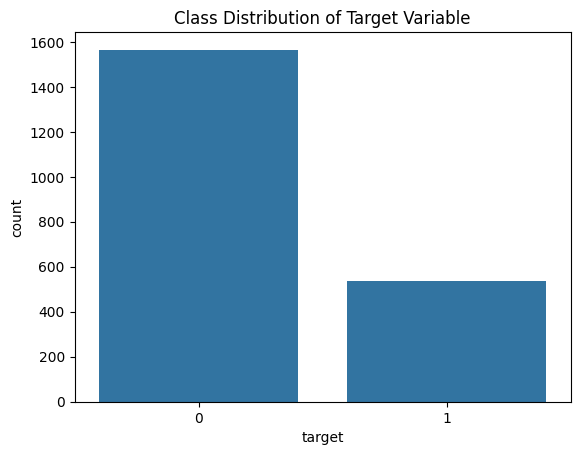

In [424]:
sns.countplot(x='target', data=train)
plt.title('Class Distribution of Target Variable')
plt.show()

# Extra point: think about what kind of the method can increase the performance (does not need to run ) #

--> An option to address the overfitting problem would be to use a model that is less prone to overfitting or to adjust the hyperparameters. Additionally, since high cardinality is an issue, using entity embeddings could be beneficial. Entity embeddings can capture relationships and correlations between complex features more effectively compared to traditional one-hot encoding.

One approach to reduce the class imbalance in the dataset involves oversampling the minority class, which generates new synthetic instances in the minority class. Techniques such as SMOTE are commonly used for this purpose. Also the process of undersampling the majority class could rebalance the class proportions. Another effective strategy could be to use algorithms explicitly designed for unbalanced datasets, such as Balanced Random Forest or EasyEnsemble.